In [1]:
import pandas as pd
import numpy as np

## Datasets inspection

Salary data:

In [2]:
salary_df = pd.read_csv("cities_avgsal.csv")

In [3]:
salary_df.head()

,City,Country,Net Salary (After Tax)
0,Zurich,Switzerland,8181.35
1,Geneva,Switzerland,7496.77
2,Copenhagen,Denmark,4752.58
3,Oslo,Norway,3893.72
4,Gothenburg,Sweden,3849.44


In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    110 non-null    object 
 1   Country                 110 non-null    object 
 2   Net Salary (After Tax)  110 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


Price data:

In [5]:
prices_df = pd.read_csv("prices.csv")

In [6]:
prices_df.head()

,City,Country,Category,Item Name,Min Local,Avg Local,Max Local,Currency,Min USD,Avg USD,Max USD
0,London,United Kingdom,Markets,"Apples, 1 kg",0.74,2.06,3.63,GBP,0.99,2.76,4.87
1,London,United Kingdom,Markets,"Banana, 1 kg",0.72,1.18,2.98,GBP,0.97,1.58,4.00
2,London,United Kingdom,Markets,"Beef Round or Equivalent Back Leg Red Meat, 1 kg",4.97,9.55,14.91,GBP,6.67,12.81,20.01
3,London,United Kingdom,Markets,"Bottle of Wine, Mid-Range Price",5.96,7.95,11.93,GBP,8.00,10.67,16.01
4,London,United Kingdom,Markets,"Chicken Breasts, Boneless and Skinless, 1 kg",3.43,6.08,8.94,GBP,4.60,8.16,12.00


In [7]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       2524 non-null   object 
 1   Country    2524 non-null   object 
 2   Category   2524 non-null   object 
 3   Item Name  2524 non-null   object 
 4   Min Local  2524 non-null   float64
 5   Avg Local  2524 non-null   float64
 6   Max Local  2524 non-null   float64
 7   Currency   2524 non-null   object 
 8   Min USD    2524 non-null   float64
 9   Avg USD    2524 non-null   float64
 10  Max USD    2524 non-null   float64
dtypes: float64(6), object(5)
memory usage: 217.0+ KB


In [8]:
prices_df["Item Name"].unique()

array(['Apples, 1 kg', 'Banana, 1 kg',
       'Beef Round or Equivalent Back Leg Red Meat, 1 kg ',
       'Bottle of Wine, Mid-Range Price',
       'Chicken Breasts, Boneless and Skinless, 1 kg',
       'Domestic Beer, 0.5 liter Bottle', 'Eggs, 12 pack',
       'Lettuce, 1 head', 'Loaf of Fresh White Bread, 0.5 kg',
       'Local Cheese, 1 kg', 'Milk, Regular,1 liter', 'Onion, 1 kg',
       'Oranges, 1 kg', 'Pack of Cigarettes', 'Potato, 1 kg',
       'White Rice, 1 kg', 'Tomato, 1 kg', 'Water, 1.5 liter Bottle',
       'Cappuccino', 'Coca-Cola, 0.33 liter Bottle',
       'Domestic Beer, 0.5 liter Draught',
       'Imported Beer, 0.33 liter Bottle',
       'McMeal at McDonalds or Alternative Combo Meal',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'Meal in Inexpensive Restaurant', 'Water, 0.33 liter Bottle'],
      dtype=object)

Coffee data:

In [9]:
coffee_df = prices_df[prices_df["Item Name"] == "Cappuccino"] # filter to coffee only

In [10]:
coffee_df.head()

,City,Country,Category,Item Name,Min Local,Avg Local,Max Local,Currency,Min USD,Avg USD,Max USD
18,London,United Kingdom,Restaurants,Cappuccino,2.09,2.94,4.97,GBP,2.80,3.94,6.67
45,New York,United States,Restaurants,Cappuccino,3.50,4.82,6.14,USD,3.50,4.82,6.14
72,Los Angeles,United States,Restaurants,Cappuccino,3.00,4.69,6.38,USD,3.00,4.69,6.38
99,Chicago,United States,Restaurants,Cappuccino,3.00,4.26,6.00,USD,3.00,4.26,6.00
126,Toronto,Canada,Restaurants,Cappuccino,2.49,4.46,6.43,CAD,1.79,3.21,4.63


In [11]:
len(coffee_df)

96

# Preparing data for analysis
Price data preparation - restaurants and markets separately:

In [12]:
prices_df["Category"].value_counts()

Category
Markets        1864
Restaurants     660
Name: count, dtype: int64

In [13]:
prices_df["Item Name"].value_counts()

Item Name
Imported Beer, 0.33 liter Bottle                         184
Domestic Beer, 0.5 liter Bottle                           96
Lettuce, 1 head                                           96
Eggs, 12 pack                                             96
Meal for 2 People, Mid-range Restaurant, Three-course     96
McMeal at McDonalds or Alternative Combo Meal             96
Water, 1.5 liter Bottle                                   96
Cappuccino                                                96
Pack of Cigarettes                                        96
Bottle of Wine, Mid-Range Price                           96
Meal in Inexpensive Restaurant                            96
Loaf of Fresh White Bread, 0.5 kg                         92
Local Cheese, 1 kg                                        92
Chicken Breasts, Boneless and Skinless, 1 kg              92
Apples, 1 kg                                              92
Banana, 1 kg                                              92
Beef Round or 

In [14]:
restaurants_prices = prices_df[prices_df["Category"] == "Restaurants"] # filter for restaurants prices only

In [15]:
restaurants_prices["City"].nunique(), len(restaurants_prices)

(96, 660)

In [16]:
markets_prices = prices_df[prices_df["Category"] == "Markets"] # filter for grocery prices only

In [17]:
markets_prices["City"].nunique(), len(markets_prices)

(96, 1864)

City-level price averages:

In [18]:
restaurants_avg = (
    restaurants_prices
    .groupby(["City", "Country"])["Avg USD"]
    .mean()
    .reset_index()
    .rename(columns={"Avg USD": "restaurant_avg_usd"})
) # average restaurant prices by city

In [19]:
restaurants_avg.head()

,City,Country,restaurant_avg_usd
0,Adelaide,Australia,13.160000
1,Amsterdam,Netherlands,20.138571
2,Antwerp,Belgium,19.958571
3,Athens,Greece,12.072857
4,Atlanta,United States,12.601429


In [20]:
restaurants_avg["City"].nunique()

96

In [21]:
markets_avg = (
    markets_prices
    .groupby(["City", "Country"])["Avg USD"]
    .mean()
    .reset_index()
    .rename(columns={"Avg USD": "market_avg_usd"})
) # average grocery prices by city

In [22]:
markets_avg.head()

,City,Country,market_avg_usd
0,Adelaide,Australia,5.0200
1,Amsterdam,Netherlands,4.4910
2,Antwerp,Belgium,4.5545
3,Athens,Greece,3.2950
4,Atlanta,United States,5.1005


In [23]:
markets_avg["City"].nunique()

96

In [24]:
len(restaurants_avg), len(markets_avg)

(96, 96)

Income data preparation:

In [25]:
salary_clean = (
    salary_df
    .rename(columns={"Net Salary (After Tax)": "monthly_net_salary"})
    [["City", "Country", "monthly_net_salary"]]
) # prepare salary data for merging

In [26]:
salary_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                110 non-null    object 
 1   Country             110 non-null    object 
 2   monthly_net_salary  110 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [27]:
coffee_clean = (
    coffee_df
    [["City", "Country", "Avg USD"]]
    .rename(columns={"Avg USD": "coffee_price_usd"})
)

In [28]:
coffee_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 18 to 2515
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              96 non-null     object 
 1   Country           96 non-null     object 
 2   coffee_price_usd  96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


# Core analysis dataset

In [29]:
coffee_salary_df = pd.merge(
    coffee_clean,
    salary_clean,
    on=["City", "Country"],
    how="inner"
)

In [30]:
coffee_salary_df.head()

,City,Country,coffee_price_usd,monthly_net_salary
0,London,United Kingdom,3.94,4729.62
1,New York,United States,4.82,5506.53
2,Los Angeles,United States,4.69,4221.12
3,Chicago,United States,4.26,5199.91
4,Toronto,Canada,3.21,3459.70


In [31]:
len(coffee_salary_df)

95

# Coffee affordability metric
 - Fraction of one day’s income spent on one cappuccino.

In [32]:
coffee_salary_df["daily_income_usd"] = (
    coffee_salary_df["monthly_net_salary"] / 30
) # convert monthly salary to daily income

coffee_salary_df[["City", "daily_income_usd"]].head()

,City,daily_income_usd
0,London,157.654000
1,New York,183.551000
2,Los Angeles,140.704000
3,Chicago,173.330333
4,Toronto,115.323333


In [33]:
coffee_salary_df["coffee_affordability"] = (
    coffee_salary_df["coffee_price_usd"] /
    coffee_salary_df["daily_income_usd"]
) # calculate coffee affordability ratio

In [34]:
coffee_salary_df[
    ["City", "coffee_price_usd", "daily_income_usd", "coffee_affordability"]
].head()

,City,coffee_price_usd,daily_income_usd,coffee_affordability
0,London,3.94,157.654000,0.024991
1,New York,4.82,183.551000,0.026260
2,Los Angeles,4.69,140.704000,0.033332
3,Chicago,4.26,173.330333,0.024577
4,Toronto,3.21,115.323333,0.027835


Interpretation:
- 0.01 → coffee costs 1% of daily income → very affordable
- 0.04 → coffee costs 4% of daily income → less affordable
- Lower = better

In [35]:
coffee_salary_df = pd.merge(
    coffee_salary_df,
    restaurants_avg,
    on=["City", "Country"],
    how="left"
) # add restaurant prices

coffee_salary_df.head()

,City,Country,coffee_price_usd,monthly_net_salary,daily_income_usd,coffee_affordability,restaurant_avg_usd
0,London,United Kingdom,3.94,4729.62,157.654000,0.024991,18.191429
1,New York,United States,4.82,5506.53,183.551000,0.026260,21.795714
2,Los Angeles,United States,4.69,4221.12,140.704000,0.033332,17.912857
3,Chicago,United States,4.26,5199.91,173.330333,0.024577,16.318571
4,Toronto,Canada,3.21,3459.70,115.323333,0.027835,14.767143


In [36]:
coffee_salary_df["restaurant_avg_usd"].isna().sum()

np.int64(0)

In [37]:
coffee_salary_df = pd.merge(
    coffee_salary_df,
    markets_avg,
    on=["City", "Country"],
    how="left"
) # add grocery prices

coffee_salary_df.head()

,City,Country,coffee_price_usd,monthly_net_salary,daily_income_usd,coffee_affordability,restaurant_avg_usd,market_avg_usd
0,London,United Kingdom,3.94,4729.62,157.654000,0.024991,18.191429,4.3310
1,New York,United States,4.82,5506.53,183.551000,0.026260,21.795714,6.4595
2,Los Angeles,United States,4.69,4221.12,140.704000,0.033332,17.912857,5.3405
3,Chicago,United States,4.26,5199.91,173.330333,0.024577,16.318571,4.9810
4,Toronto,Canada,3.21,3459.70,115.323333,0.027835,14.767143,4.3165


In [38]:
coffee_salary_df["market_avg_usd"].isna().sum()

np.int64(0)

In [39]:
coffee_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  95 non-null     object 
 1   Country               95 non-null     object 
 2   coffee_price_usd      95 non-null     float64
 3   monthly_net_salary    95 non-null     float64
 4   daily_income_usd      95 non-null     float64
 5   coffee_affordability  95 non-null     float64
 6   restaurant_avg_usd    95 non-null     float64
 7   market_avg_usd        95 non-null     float64
dtypes: float64(6), object(2)
memory usage: 6.1+ KB


# Ranking cities by coffee affordability

In [40]:
coffee_salary_df_sorted = coffee_salary_df.sort_values(
    by="coffee_affordability",
    ascending=True
) # sort cities by coffee affordability - best -> worst

In [41]:
coffee_salary_df_sorted[
    ["City", "Country", "coffee_price_usd", "monthly_net_salary", "coffee_affordability"]
].head(10) # top 10

,City,Country,coffee_price_usd,monthly_net_salary,coffee_affordability
72,San Francisco,United States,4.71,7208.69,0.019601
6,Rome,Italy,1.56,2235.51,0.020935
74,Boston,United States,4.32,6085.25,0.021297
63,Melbourne,Australia,3.04,4257.51,0.021421
73,Seattle,United States,4.74,6551.45,0.021705
46,The Hague,Netherlands,3.33,4596.37,0.021735
10,Geneva,Switzerland,5.62,7496.77,0.022490
65,Sydney,Australia,2.90,3831.96,0.022704
64,Brisbane,Australia,3.14,3941.48,0.023900
78,Austin,United States,3.95,4911.67,0.024126


In [42]:
coffee_salary_df_sorted[
    ["City", "Country", "coffee_price_usd", "monthly_net_salary", "coffee_affordability"]
].tail(10) # bottom 10

,City,Country,coffee_price_usd,monthly_net_salary,coffee_affordability
94,Rio de Janeiro,Brazil,1.25,474.02,0.079111
58,Guangzhou,China,3.82,1401.36,0.081778
93,Bogota,Colombia,1.23,435.19,0.084791
61,Bangkok,Thailand,2.32,815.89,0.085306
57,Beijing,China,4.11,1425.93,0.086470
90,Santiago,Chile,2.46,848.58,0.086969
32,Athens,Greece,3.76,1252.33,0.090072
33,Thessaloniki,Greece,3.77,1132.27,0.099888
62,Jakarta,Indonesia,1.97,476.53,0.124022
92,Lima,Peru,2.88,629.81,0.137184


# Visualizing coffee affordability

Bar chart: top 10 most affordable cities
- shows the ten cities where a cappuccino represents the smallest share of an average day’s income.

In [43]:
import os
os.makedirs("figures", exist_ok=True)

In [44]:
top10 = coffee_salary_df_sorted.head(10)

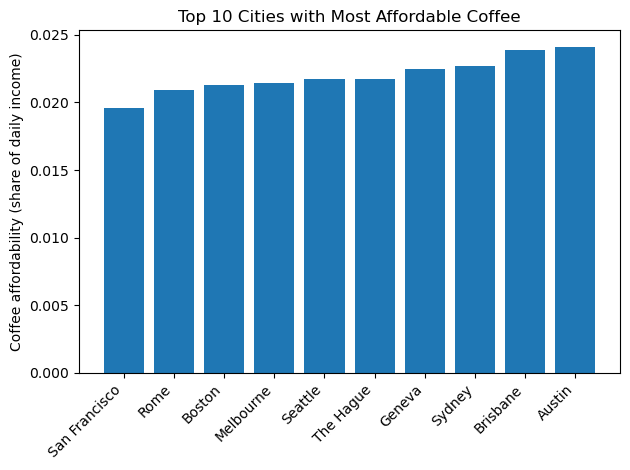

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    top10["City"],
    top10["coffee_affordability"]
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coffee affordability (share of daily income)")
plt.title("Top 10 Cities with Most Affordable Coffee")
plt.tight_layout()
plt.savefig("figures/affordability_vs_income.png", dpi=200, bbox_inches="tight")
plt.show()


Scatter plot: income vs coffee price
- shows why affordability differs across cities:
    - Bottom-right (high income, moderate price):
        darker colors → very affordable coffee
    - Top-left (low income, moderate price):
        lighter colors → less affordable coffee

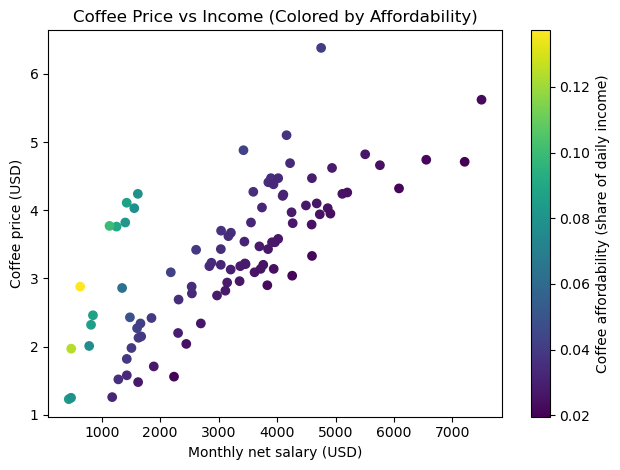

In [46]:
plt.figure()
plt.scatter(
    coffee_salary_df["monthly_net_salary"],
    coffee_salary_df["coffee_price_usd"],
    c=coffee_salary_df["coffee_affordability"]
)
plt.xlabel("Monthly net salary (USD)")
plt.ylabel("Coffee price (USD)")
plt.title("Coffee Price vs Income (Colored by Affordability)")
plt.colorbar(label="Coffee affordability (share of daily income)")
plt.tight_layout()
plt.savefig("figures/income_vs_coffee.png", dpi=200, bbox_inches="tight")
plt.show()


Cities with similar coffee prices differ strongly by income - coffee affordability is driven more by income differences than by coffee prices.

# Country-level spatial view of coffee affordability

In [47]:
country_affordability = (
    coffee_salary_df
    .groupby("Country")["coffee_affordability"]
    .mean()
    .reset_index()
    .sort_values("coffee_affordability")
) # aggregating to country level

In [48]:
country_affordability.head()

,Country,coffee_affordability
17,Italy,0.020935
30,Switzerland,0.022490
1,Australia,0.024273
33,United Kingdom,0.024991
34,United States,0.026546


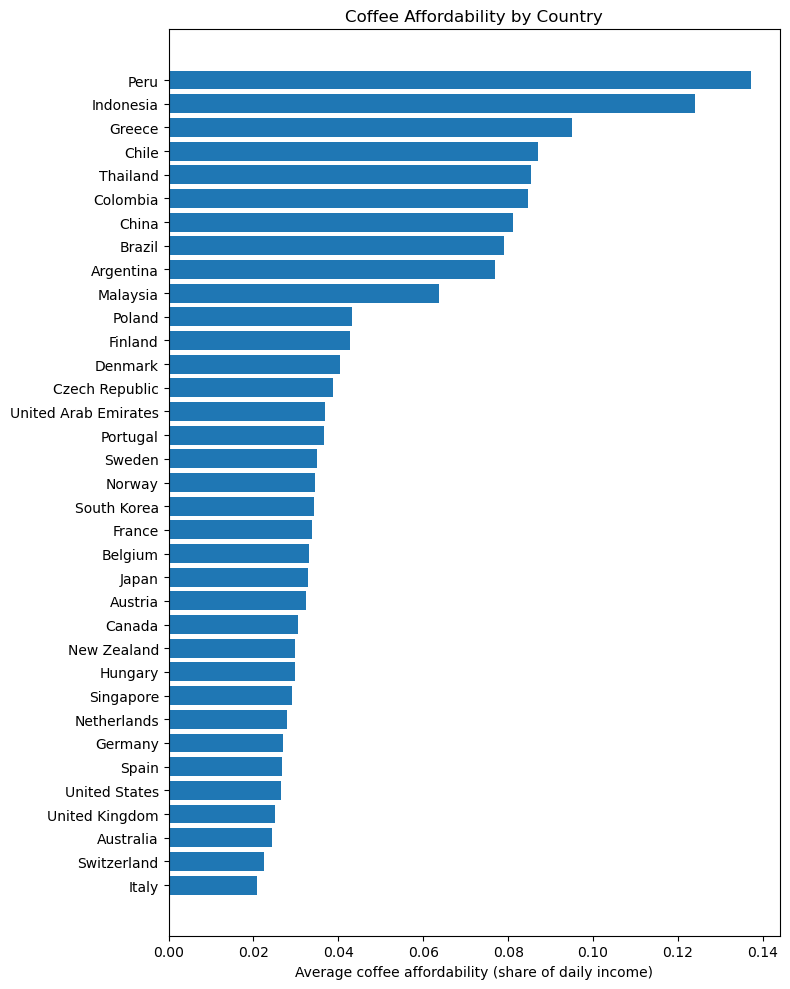

In [49]:
plt.figure(figsize=(8, 10))
plt.barh(
    country_affordability["Country"],
    country_affordability["coffee_affordability"]
)
plt.xlabel("Average coffee affordability (share of daily income)")
plt.title("Coffee Affordability by Country")
plt.tight_layout()
plt.savefig("figures/affordability_by_country.png", dpi=200, bbox_inches="tight")
plt.show()


# Coffee affordability vs price environment
Goal of this step:
Check whether coffee affordability is related to:
- restaurant price levels
- market price levels

In [50]:
# comment in readme.md about this section

Scatter: restaurant prices vs coffee affordability:

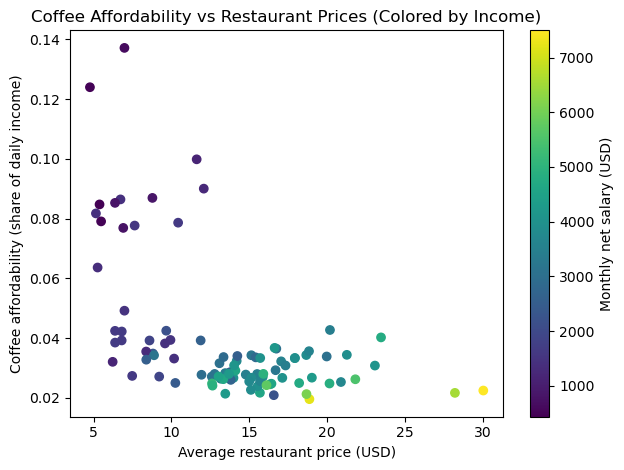

In [51]:
plt.figure()
plt.scatter(
    coffee_salary_df["restaurant_avg_usd"],
    coffee_salary_df["coffee_affordability"],
    c=coffee_salary_df["monthly_net_salary"]
)
plt.xlabel("Average restaurant price (USD)")
plt.ylabel("Coffee affordability (share of daily income)")
plt.title("Coffee Affordability vs Restaurant Prices (Colored by Income)")
plt.colorbar(label="Monthly net salary (USD)")
plt.tight_layout()
plt.savefig("figures/restaurant_vs_coffee.png", dpi=200, bbox_inches="tight")
plt.show()


High restaurant prices do not automatically mean coffee is unaffordable.
- cities with high restaurant prices often have low coffee affordability values
- coffee affordability is driven much more by income differences than by general price levels.

Scatter: market prices vs coffee affordability:

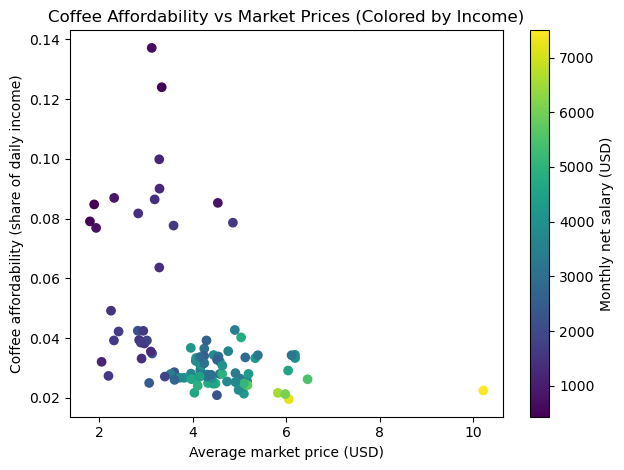

In [52]:
plt.figure()
plt.scatter(
    coffee_salary_df["market_avg_usd"],
    coffee_salary_df["coffee_affordability"],
    c=coffee_salary_df["monthly_net_salary"]
)
plt.xlabel("Average market price (USD)")
plt.ylabel("Coffee affordability (share of daily income)")
plt.title("Coffee Affordability vs Market Prices (Colored by Income)")
plt.colorbar(label="Monthly net salary (USD)")
plt.tight_layout()
plt.savefig("figures/market_vs_coffee.png", dpi=200, bbox_inches="tight")
plt.show()

In [53]:
# essentially the same structure as restaurant prices

## General city-level price index
- averaging market and restaurant prices

In [54]:
coffee_salary_df["general_price_index"] = coffee_salary_df[
    ["restaurant_avg_usd", "market_avg_usd"]
].mean(axis=1) # average of restaurant and market prices as general price index

Expressing coffee prices relative to the general price index

In [55]:
coffee_salary_df["coffee_relative_price"] = (
    coffee_salary_df["coffee_price_usd"] /
    coffee_salary_df["general_price_index"]
) # coffee price relative to general price level

In [56]:
coffee_salary_df[
    ["City", "Country", "coffee_price_usd",
     "general_price_index", "coffee_relative_price"]
].sort_values("coffee_relative_price").head(10) # top 10 cities with cheapest coffee relative to general price level


,City,Country,coffee_price_usd,general_price_index,coffee_relative_price
6,Rome,Italy,1.56,10.544107,0.147950
31,Coimbra,Portugal,1.58,6.539786,0.241598
85,Ottawa,Canada,3.14,12.894583,0.243513
7,Barcelona,Spain,2.20,8.687393,0.253241
30,Braga,Portugal,1.52,5.743071,0.264667
25,Madrid,Spain,2.34,8.710143,0.268652
27,Seville,Spain,1.71,6.310679,0.270969
73,Seattle,United States,4.74,17.005000,0.278742
10,Geneva,Switzerland,5.62,20.111107,0.279448
44,Antwerp,Belgium,3.43,12.256536,0.279851


In [57]:
coffee_salary_df[
    ["City", "Country", "coffee_price_usd",
     "general_price_index", "coffee_relative_price"]
].sort_values("coffee_relative_price", ascending=False).head(10) # bottom 10 cities with most expensive coffee relative to general price level

,City,Country,coffee_price_usd,general_price_index,coffee_relative_price
58,Guangzhou,China,3.82,3.996893,0.955742
57,Beijing,China,4.11,4.960036,0.828623
56,Shanghai,China,4.03,5.616786,0.717492
60,Kuala Lumpur,Malaysia,2.86,4.275464,0.668933
92,Lima,Peru,2.88,5.055679,0.569656
59,Shenzhen,China,4.24,7.645417,0.554581
37,Lublin,Poland,2.43,4.620429,0.525925
35,Szczecin,Poland,2.34,4.615714,0.506964
33,Thessaloniki,Greece,3.77,7.452821,0.505849
53,Dubai,United Arab Emirates,5.10,10.290321,0.495611


Scatter plot: relative price vs affordability

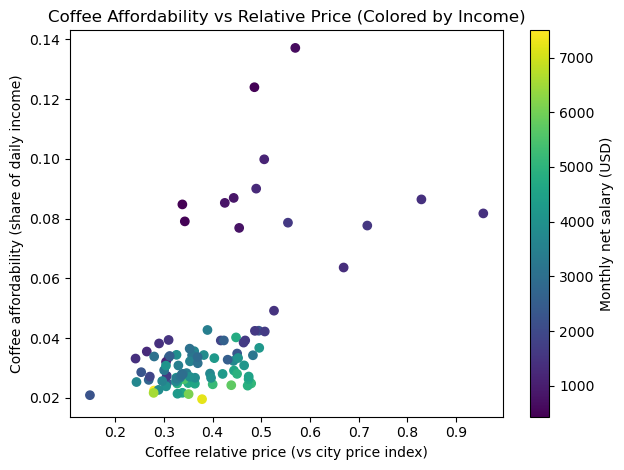

In [58]:
plt.figure()
plt.scatter(
    coffee_salary_df["coffee_relative_price"],
    coffee_salary_df["coffee_affordability"],
    c=coffee_salary_df["monthly_net_salary"]
)
plt.xlabel("Coffee relative price (vs city price index)")
plt.ylabel("Coffee affordability (share of daily income)")
plt.title("Coffee Affordability vs Relative Price (Colored by Income)")
plt.colorbar(label="Monthly net salary (USD)")
plt.tight_layout()
plt.savefig("figures/relative_price_vs_affordability.png", dpi=200, bbox_inches="tight")
plt.show()


# Coffee survival index

In [59]:
monthly_coffee_budget = 30.0

coffee_salary_df["coffee_survival_days_30"] = (
    monthly_coffee_budget / coffee_salary_df["coffee_price_usd"]
) # coffee survival days for a single monthly budget (e.g. 30 USD)

In [60]:
coffee_salary_df["coffee_survival_days_30"].describe()

count    95.000000
mean     10.149869
std       4.185329
min       4.702194
25%       7.344040
50%       8.771930
75%      11.030754
max      24.390244
Name: coffee_survival_days_30, dtype: float64

In [61]:
coffee_salary_df[["City","Country","coffee_price_usd","coffee_survival_days_30"]].sort_values(
    "coffee_survival_days_30", ascending=False).head(10) # top 10 cities for coffee survival days

,City,Country,coffee_price_usd,coffee_survival_days_30
93,Bogota,Colombia,1.23,24.390244
94,Rio de Janeiro,Brazil,1.25,24.000000
39,Debrecen,Hungary,1.26,23.809524
38,Budapest,Hungary,1.48,20.270270
30,Braga,Portugal,1.52,19.736842
6,Rome,Italy,1.56,19.230769
31,Coimbra,Portugal,1.58,18.987342
27,Seville,Spain,1.71,17.543860
29,Porto,Portugal,1.82,16.483516
62,Jakarta,Indonesia,1.97,15.228426


In [62]:
coffee_salary_df[
    ["City", "Country", "coffee_price_usd", "coffee_survival_days_30"]
].sort_values("coffee_survival_days_30").head(10) # bottom 10 cities for coffee survival days

,City,Country,coffee_price_usd,coffee_survival_days_30
11,Copenhagen,Denmark,6.38,4.702194
10,Geneva,Switzerland,5.62,5.338078
53,Dubai,United Arab Emirates,5.10,5.882353
21,Helsinki,Finland,4.88,6.147541
1,New York,United States,4.82,6.224066
73,Seattle,United States,4.74,6.329114
72,San Francisco,United States,4.71,6.369427
2,Los Angeles,United States,4.69,6.396588
75,San Jose,United States,4.66,6.437768
77,Denver,United States,4.62,6.493506


In [63]:
top10_survival = (
    coffee_salary_df
    .sort_values("coffee_survival_days_30", ascending=False)
    .head(10)
)

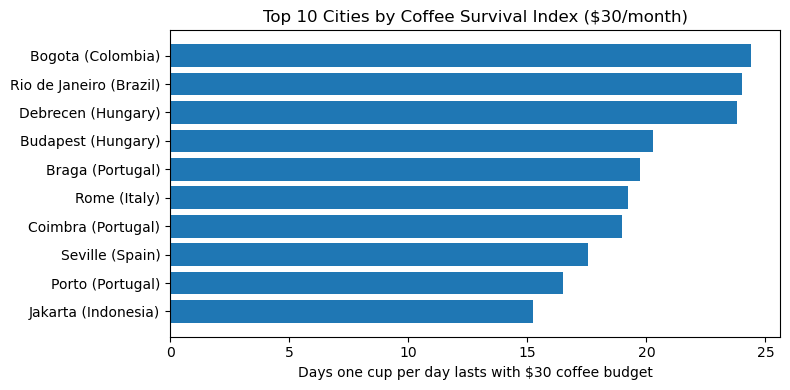

In [64]:
plt.figure(figsize=(8, 4))
plt.barh(
    top10_survival["City"] + " (" + top10_survival["Country"] + ")",
    top10_survival["coffee_survival_days_30"]
)
plt.xlabel("Days one cup per day lasts with $30 coffee budget")
plt.title("Top 10 Cities by Coffee Survival Index ($30/month)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/top_10_cities_by_survival.png", dpi=200, bbox_inches="tight")
plt.show()

# Link Coffee Survival Index to income & prices

Scatter: Survival days vs income (colored by relative price)

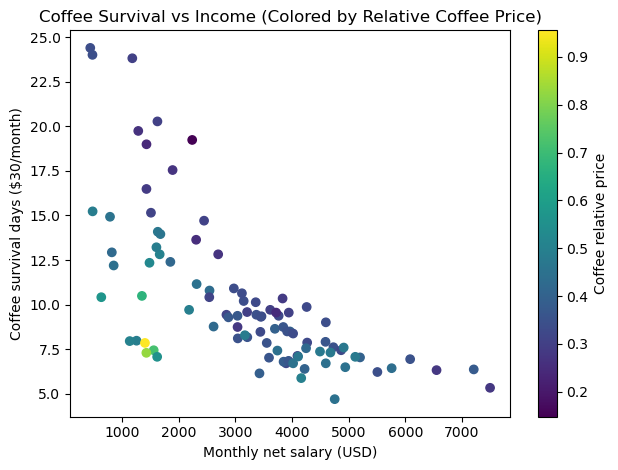

In [65]:
plt.figure()
plt.scatter(
    coffee_salary_df["monthly_net_salary"],
    coffee_salary_df["coffee_survival_days_30"],
    c=coffee_salary_df["coffee_relative_price"]
)
plt.xlabel("Monthly net salary (USD)")
plt.ylabel("Coffee survival days ($30/month)")
plt.title("Coffee Survival vs Income (Colored by Relative Coffee Price)")
plt.colorbar(label="Coffee relative price")
plt.tight_layout()
plt.savefig("figures/survival_vs_income.png", dpi=200, bbox_inches="tight")
plt.show()

Although higher-income cities exhibit lower coffee survival days, this reflects higher absolute coffee prices rather than lower affordability; income-based affordability metrics show the opposite pattern.

# “Best cities for caffeine-addicted students” ranking

For a student, a “good” coffee city means:
- Coffee is affordable (low coffee_affordability)
- Daily living is not extremely expensive (general_price_index)
- Coffee is not unusually overpriced relative to other goods (coffee_relative_price)

In [66]:
student_score_df = coffee_salary_df.copy()
student_score_df["relative_cost_of_living"] = (student_score_df["general_price_index"] / student_score_df["general_price_index"].max())

student_score_df["student_score"] = (
    student_score_df["coffee_affordability"] * 0.5 +
    student_score_df["coffee_relative_price"] * 0.3 +
    student_score_df["relative_cost_of_living"] * 0.2
)


In [67]:
best_cities = (
    student_score_df
    .sort_values("student_score", ascending=True)
    [["City", "Country", "student_score", "coffee_affordability", "coffee_relative_price","relative_cost_of_living"]]
) # ranking cities for students based on composite score


In [68]:
best_cities.head(10) # top 10 best cities for coffee-loving students

,City,Country,student_score,coffee_affordability,coffee_relative_price,relative_cost_of_living
39,Debrecen,Hungary,0.148502,0.032097,0.304214,0.205947
38,Budapest,Hungary,0.153545,0.027386,0.305675,0.240750
31,Coimbra,Portugal,0.154111,0.033190,0.241598,0.325183
30,Braga,Portugal,0.154286,0.035544,0.264667,0.285567
27,Seville,Spain,0.157626,0.027153,0.270969,0.313791
6,Rome,Italy,0.159711,0.020935,0.147950,0.524293
29,Porto,Portugal,0.168530,0.038250,0.289918,0.312148
26,Valencia,Spain,0.170634,0.025027,0.306259,0.331212
28,Lisbon,Portugal,0.176178,0.039415,0.309503,0.318101
7,Barcelona,Spain,0.176682,0.028632,0.253241,0.431970


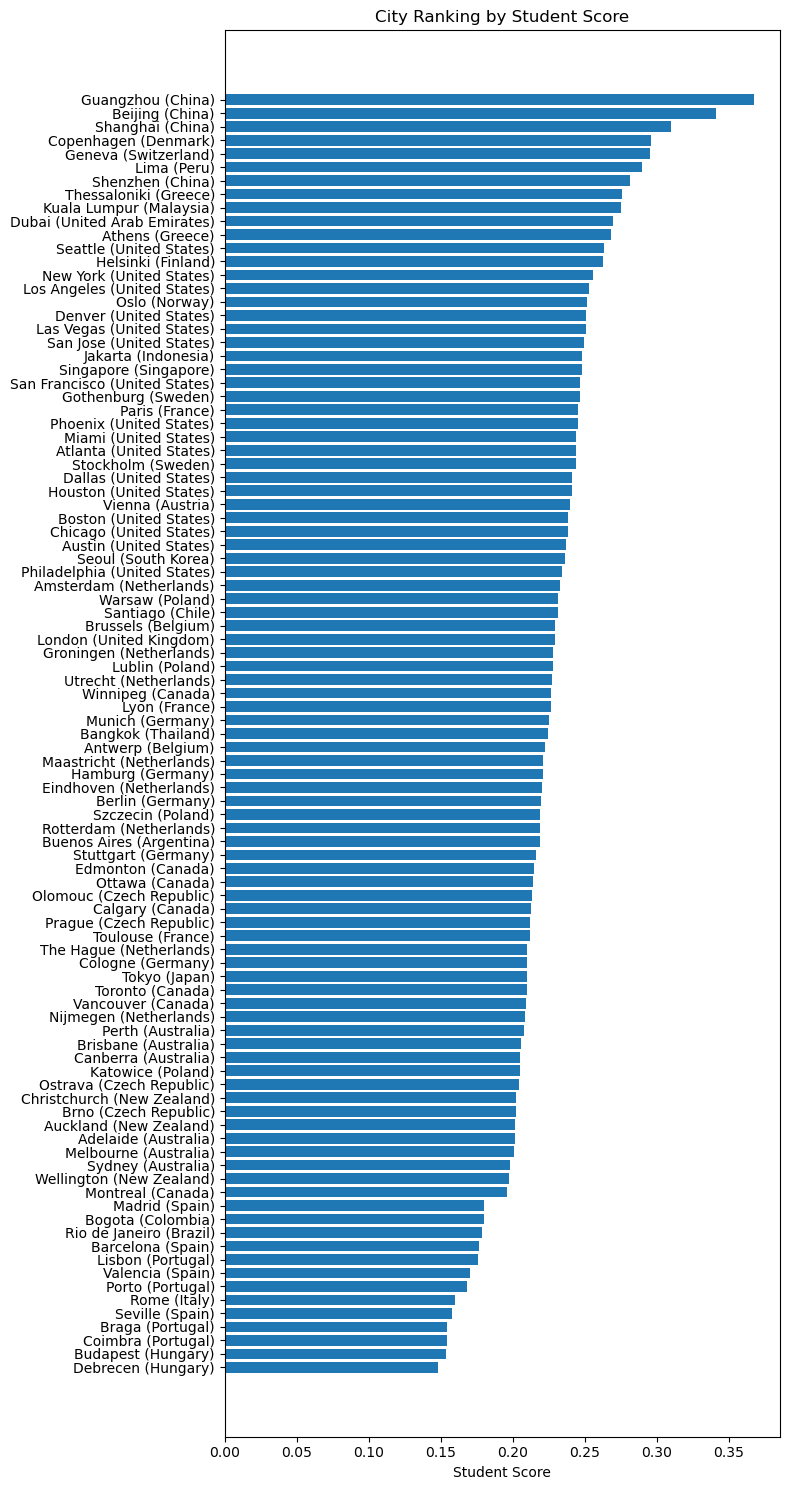

In [69]:
plt.figure(figsize=(8, 15))
plt.barh(
    best_cities["City"] + " (" + best_cities["Country"] + ")",
    best_cities["student_score"]
)
plt.xlabel("Student Score")
plt.title("City Ranking by Student Score")
plt.tight_layout()
plt.savefig("figures/student_best_cities.png", dpi=200, bbox_inches="tight")
plt.show()

In [70]:
best_countries = (
    best_cities
    .groupby("Country")["student_score"]
    .mean()
    .reset_index()
    .sort_values("student_score")
) # aggregating to country level

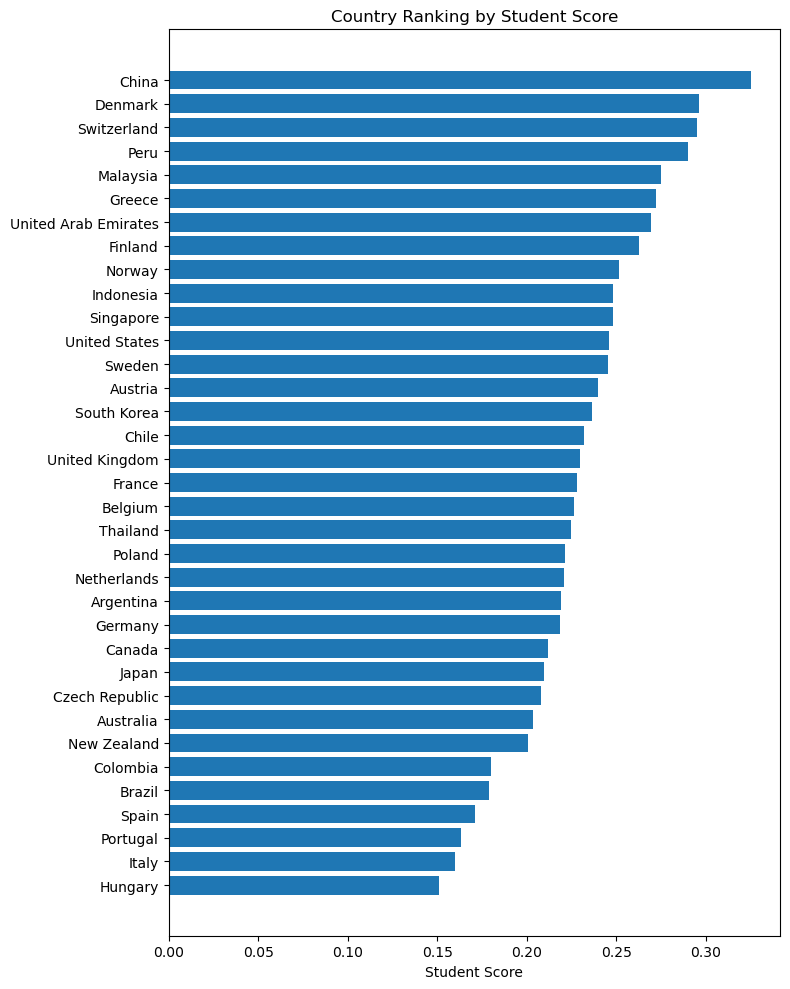

In [71]:
plt.figure(figsize=(8, 10))
plt.barh(
    best_countries["Country"],
    best_countries["student_score"]
)
plt.xlabel("Student Score")
plt.title("Country Ranking by Student Score")
plt.tight_layout()
plt.savefig("figures/student_best_countries.png", dpi=200, bbox_inches="tight")
plt.show()